<a href="https://colab.research.google.com/github/sameer0013/Data-science/blob/main/KMeans/Project_on_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BANK NOTE AUTHENTICATION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GauravChoudhay/K_MEANS/main/php50jXam.csv')

In [3]:
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [7]:
df['Class'].value_counts() # 1-> for right note,2->wrong note

1    762
2    610
Name: Class, dtype: int64

# Description of dataset

-> v1-variance of wavelet transformation image

-> v2-skewness

-> v3-curtosis

->v4-entropy

-> class- 1 for right ,2 for wrong 

In [8]:
df.shape

(1372, 5)

In [10]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [67]:
df.Class.unique()

array([1, 2])

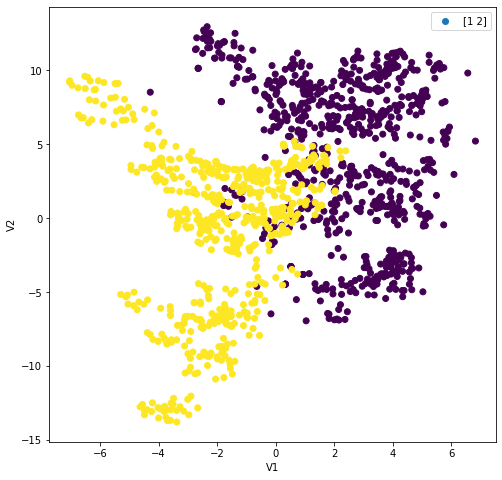

In [60]:
plt.figure(figsize=(8,8))
plt.scatter(df['V1'],df['V2'],c=df.Class,label=df.Class.unique())
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()

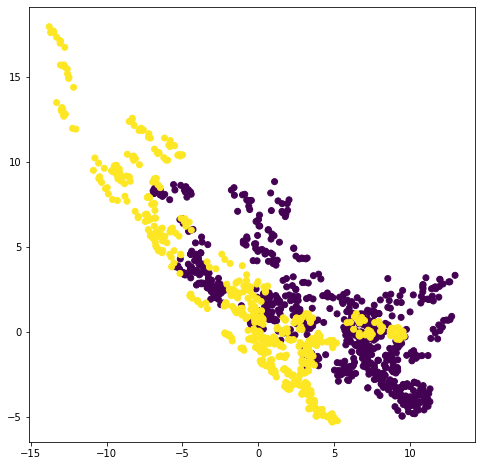

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(df['V2'],df['V3'],c=df.Class)
plt.show()

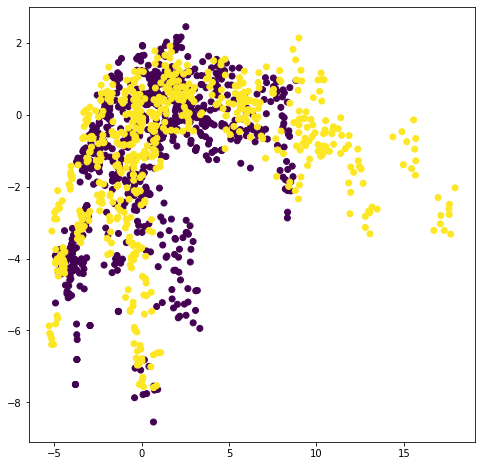

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(df['V3'],df['V4'],c=df.Class)
plt.show()

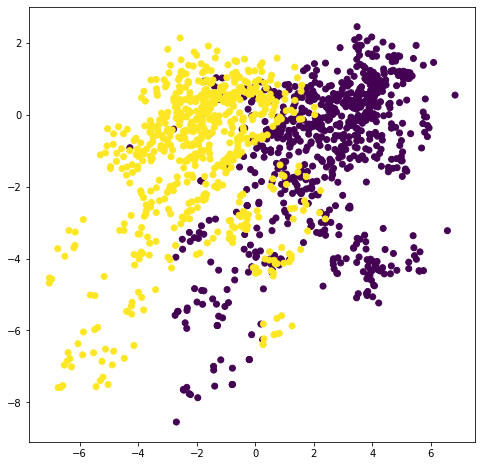

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(df['V1'],df['V4'],c=df.Class)
plt.show()

# use V1 and V2 as they can made cluster more effectively

In [19]:
data = np.column_stack((df['V1'],df['V2']))

In [20]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters=2)


In [25]:
km.fit(data)

KMeans(n_clusters=2)

In [29]:
km.labels_ #label check for prediction

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [31]:
df['KMeans'] = km.labels_ 

In [30]:
centeroid=km.cluster_centers_ #coordinates where centeroid is made in dataset for cluster

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


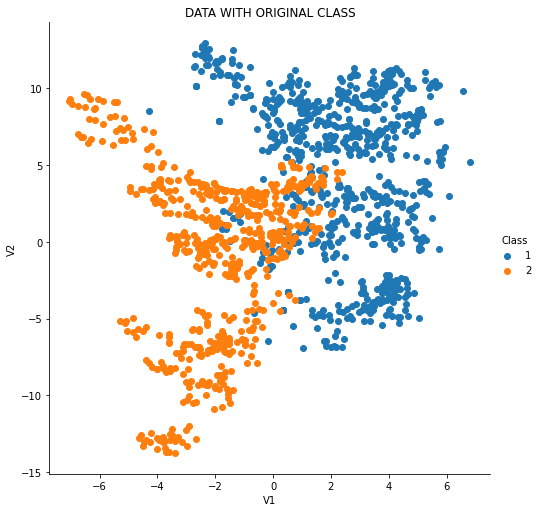

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


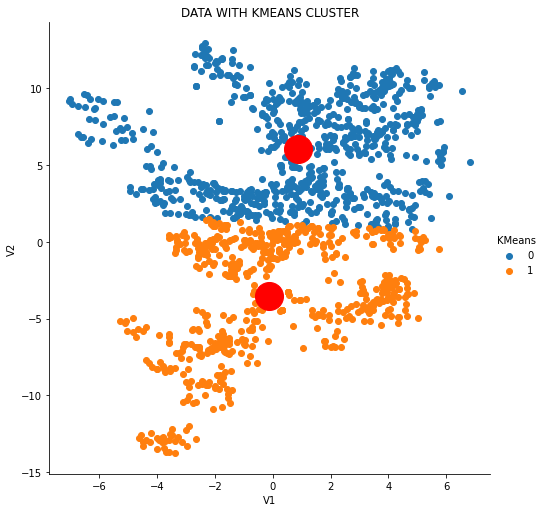

In [73]:
fig=sns.FacetGrid(data=df,hue='Class',size=7)
fig.map(plt.scatter,'V1','V2')
fig.add_legend()
plt.title("DATA WITH ORIGINAL CLASS")
plt.show()

fig=sns.FacetGrid(data=df,hue='KMeans',size=7)
fig.map(plt.scatter,'V1','V2')
fig.add_legend()
plt.scatter(centeroid[:,0],centeroid[:,1],s=786,marker="o",c='red')
plt.title("DATA WITH KMEANS CLUSTER")
plt.show()

In [74]:
df['KMeans'] = df['KMeans'].map({0:1,1:2})

In [75]:
df['KMeans'].unique()

array([1, 2])

In [81]:
df.shape[0]

1372

In [83]:
correct=0
for i in range(0,df.shape[0]):
  if df['Class'][i] == df['KMeans'][i]:
    correct +=1
print(correct/df.shape[0])    

0.6508746355685131


In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(df['KMeans'],df['Class'])

0.6508746355685131

#Finding Best k?

In [84]:
km.inertia_

26938.068701925025

In [107]:
error=[]
for k in range(1,10):
  km = KMeans(n_clusters=k)
  km.fit(data)
  error.append(km.inertia_)


In [108]:
error

[58304.52906491894,
 26944.12764167487,
 16618.34505259317,
 12798.314280993092,
 9958.270547538452,
 7620.283114801987,
 6574.13681773765,
 5660.78447312185,
 4836.0689564144]

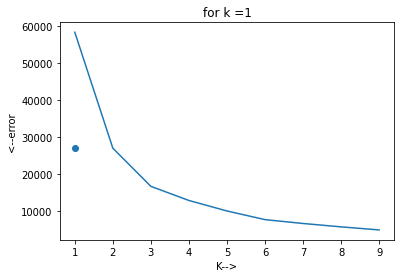

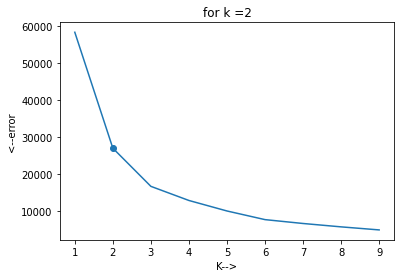

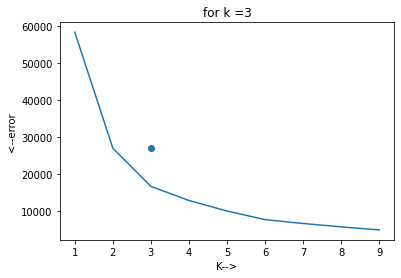

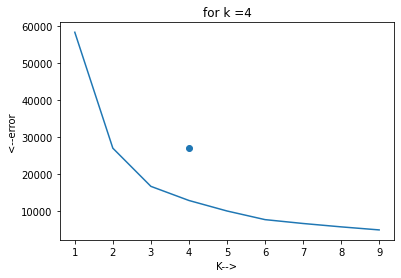

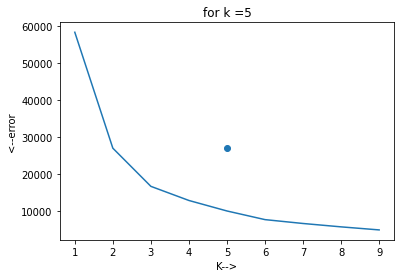

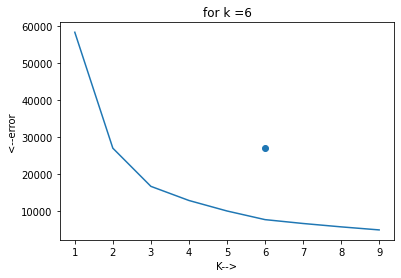

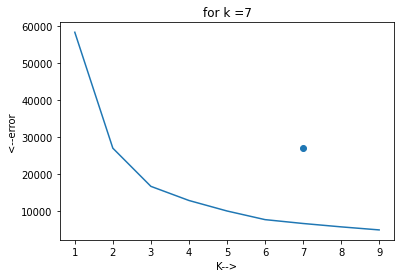

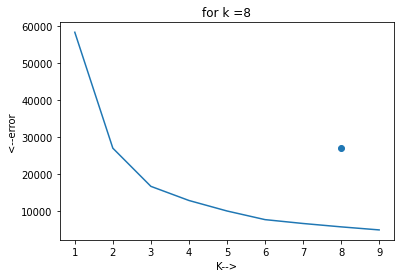

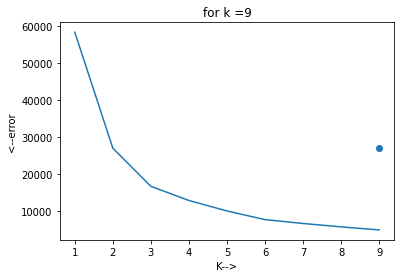

In [122]:
for k in range(1,10):
  plt.title(f'for k ={str(k)}')
  plt.plot(range(1,10),error)
  plt.scatter(x=k,y=error[1])
  plt.xlabel('K-->')
  plt.ylabel("<--error")
  plt.show()